In [1]:
# Install packages if needed (run this cell if you get import errors)
import sys
!{sys.executable} -m pip install matplotlib numpy


In [11]:
# Fixed Size Window - Naive Approach (O(n*k))
def max_sum_naive(arr, k):
    n = len(arr)
    if n < k:
        return None
    
    max_sum = float('-inf')
    
    # Try every possible window
    for i in range(n - k + 1):
        window_sum = 0
        # Sum elements in current window
        for j in range(i, i + k):
            window_sum += arr[j]
        max_sum = max(max_sum, window_sum)
    
    return max_sum

# Test
arr = [1, 3, 5, 7, 9, 2, 4]
k = 3
print(f"Array: {arr}")
print(f"Window size: {k}")
print(f"Maximum sum (naive): {max_sum_naive(arr, k)}")

# Let's trace through the algorithm
print("\nStep-by-step:")
for i in range(len(arr) - k + 1):
    window = arr[i:i+k]
    print(f"Window {i+1}: {window} -> Sum: {sum(window)}")


Array: [1, 3, 5, 7, 9, 2, 4]
Window size: 3
Maximum sum (naive): 21

Step-by-step:
Window 1: [1, 3, 5] -> Sum: 9
Window 2: [3, 5, 7] -> Sum: 15
Window 3: [5, 7, 9] -> Sum: 21
Window 4: [7, 9, 2] -> Sum: 18
Window 5: [9, 2, 4] -> Sum: 15


In [3]:
# Fixed Size Window - Sliding Window Approach (O(n))
def max_sum_sliding_window(arr, k):
    n = len(arr)
    if n < k:
        return None
    
    # Calculate sum of first window
    window_sum = sum(arr[:k])
    max_sum = window_sum
    
    # Slide the window
    for i in range(k, n):
        # Remove leftmost element of previous window
        # Add rightmost element of new window
        window_sum = window_sum - arr[i - k] + arr[i]
        max_sum = max(max_sum, window_sum)
    
    return max_sum

# Test and visualize
print(f"Maximum sum (sliding window): {max_sum_sliding_window(arr, k)}")

# Visualize the sliding process
print("\nSliding Window Process:")
window_sum = sum(arr[:k])
print(f"Initial window: {arr[:k]} -> Sum: {window_sum}")

for i in range(k, len(arr)):
    print(f"\nSlide {i-k+1}:")
    print(f"  Remove: {arr[i-k]}")
    print(f"  Add: {arr[i]}")
    window_sum = window_sum - arr[i-k] + arr[i]
    print(f"  New window: {arr[i-k+1:i+1]} -> Sum: {window_sum}")


Maximum sum (sliding window): 21

Sliding Window Process:
Initial window: [1, 3, 5] -> Sum: 9

Slide 1:
  Remove: 1
  Add: 7
  New window: [3, 5, 7] -> Sum: 15

Slide 2:
  Remove: 3
  Add: 9
  New window: [5, 7, 9] -> Sum: 21

Slide 3:
  Remove: 5
  Add: 2
  New window: [7, 9, 2] -> Sum: 18

Slide 4:
  Remove: 7
  Add: 4
  New window: [9, 2, 4] -> Sum: 15


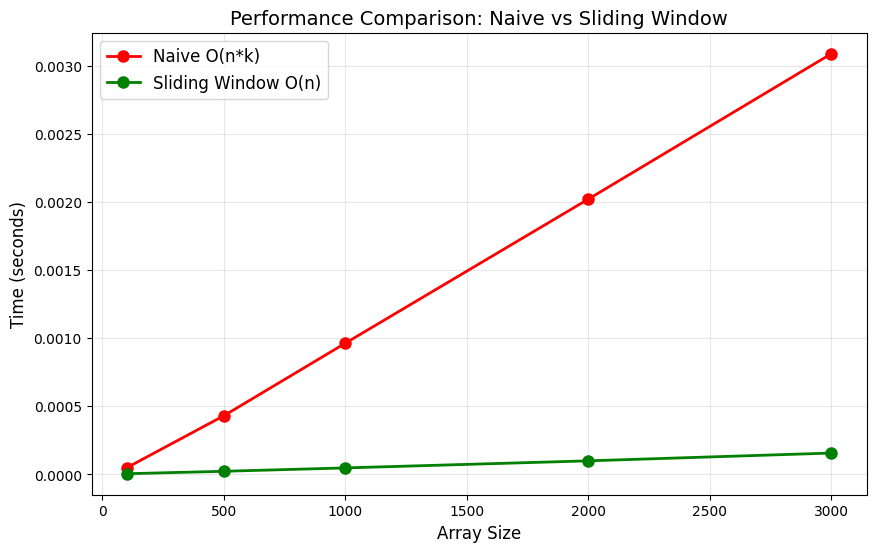

In [4]:
# Time Complexity Comparison
import time
import random
import matplotlib.pyplot as plt

def compare_performance():
    sizes = [100, 500, 1000, 2000, 3000]
    k = 50
    naive_times = []
    sliding_times = []
    
    for n in sizes:
        arr = [random.randint(1, 100) for _ in range(n)]
        
        # Time naive approach
        start = time.time()
        max_sum_naive(arr, k)
        naive_times.append(time.time() - start)
        
        # Time sliding window approach
        start = time.time()
        max_sum_sliding_window(arr, k)
        sliding_times.append(time.time() - start)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, naive_times, 'r-o', label='Naive O(n*k)', linewidth=2, markersize=8)
    plt.plot(sizes, sliding_times, 'g-o', label='Sliding Window O(n)', linewidth=2, markersize=8)
    plt.xlabel('Array Size', fontsize=12)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.title('Performance Comparison: Naive vs Sliding Window', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

compare_performance()


In [5]:
# Variable Size Window - Smallest Subarray with Sum >= Target
def min_subarray_sum(arr, target):
    n = len(arr)
    min_length = float('inf')
    window_sum = 0
    left = 0
    
    # Expand window with right pointer
    for right in range(n):
        window_sum += arr[right]
        
        # Contract window while condition is met
        while window_sum >= target and left <= right:
            min_length = min(min_length, right - left + 1)
            window_sum -= arr[left]
            left += 1
    
    return min_length if min_length != float('inf') else 0

# Test with visualization
arr = [2, 3, 1, 2, 4, 3]
target = 7
print(f"Array: {arr}")
print(f"Target sum: {target}")
print(f"Minimum subarray length: {min_subarray_sum(arr, target)}")

# Detailed trace
def trace_variable_window(arr, target):
    n = len(arr)
    left = 0
    window_sum = 0
    step = 0
    
    print("\nStep-by-step trace:")
    for right in range(n):
        window_sum += arr[right]
        print(f"\nStep {step}: Expand window")
        print(f"  Right pointer moves to index {right} (value: {arr[right]})")
        print(f"  Window: {arr[left:right+1]}")
        print(f"  Sum: {window_sum}")
        step += 1
        
        while window_sum >= target and left <= right:
            print(f"\n  Sum {window_sum} >= {target}, try to shrink")
            print(f"  Current window length: {right - left + 1}")
            window_sum -= arr[left]
            left += 1
            if left <= right:
                print(f"  After shrinking: {arr[left:right+1]}, Sum: {window_sum}")

trace_variable_window(arr, target)


Array: [2, 3, 1, 2, 4, 3]
Target sum: 7
Minimum subarray length: 2

Step-by-step trace:

Step 0: Expand window
  Right pointer moves to index 0 (value: 2)
  Window: [2]
  Sum: 2

Step 1: Expand window
  Right pointer moves to index 1 (value: 3)
  Window: [2, 3]
  Sum: 5

Step 2: Expand window
  Right pointer moves to index 2 (value: 1)
  Window: [2, 3, 1]
  Sum: 6

Step 3: Expand window
  Right pointer moves to index 3 (value: 2)
  Window: [2, 3, 1, 2]
  Sum: 8

  Sum 8 >= 7, try to shrink
  Current window length: 4
  After shrinking: [3, 1, 2], Sum: 6

Step 4: Expand window
  Right pointer moves to index 4 (value: 4)
  Window: [3, 1, 2, 4]
  Sum: 10

  Sum 10 >= 7, try to shrink
  Current window length: 4
  After shrinking: [1, 2, 4], Sum: 7

  Sum 7 >= 7, try to shrink
  Current window length: 3
  After shrinking: [2, 4], Sum: 6

Step 5: Expand window
  Right pointer moves to index 5 (value: 3)
  Window: [2, 4, 3]
  Sum: 9

  Sum 9 >= 7, try to shrink
  Current window length: 3
  Aft

In [6]:
# Variable Size Window - Longest Substring Without Repeating Characters
def longest_substring_no_repeat(s):
    char_set = set()
    left = 0
    max_length = 0
    
    for right in range(len(s)):
        # If character already in window, shrink from left
        while s[right] in char_set:
            char_set.remove(s[left])
            left += 1
        
        # Add current character to window
        char_set.add(s[right])
        max_length = max(max_length, right - left + 1)
    
    return max_length

# Test cases with visualization
test_strings = ["abcabcbb", "bbbbb", "pwwkew", ""]

for s in test_strings:
    result = longest_substring_no_repeat(s)
    print(f"String: '{s}' -> Longest substring length: {result}")

# Detailed visualization for one example
def visualize_substring_search(s):
    print(f"\nDetailed trace for '{s}':")
    char_set = set()
    left = 0
    
    for right in range(len(s)):
        print(f"\n--- Position {right}: '{s[right]}' ---")
        
        # Check if we need to shrink
        if s[right] in char_set:
            print(f"'{s[right]}' already in window!")
            while s[right] in char_set:
                print(f"  Remove '{s[left]}' from left")
                char_set.remove(s[left])
                left += 1
        
        # Add current character
        char_set.add(s[right])
        window = s[left:right+1]
        print(f"Current window: '{window}' (length: {len(window)})")
        print(f"Character set: {char_set}")

visualize_substring_search("abcabcbb")


String: 'abcabcbb' -> Longest substring length: 3
String: 'bbbbb' -> Longest substring length: 1
String: 'pwwkew' -> Longest substring length: 3
String: '' -> Longest substring length: 0

Detailed trace for 'abcabcbb':

--- Position 0: 'a' ---
Current window: 'a' (length: 1)
Character set: {'a'}

--- Position 1: 'b' ---
Current window: 'ab' (length: 2)
Character set: {'b', 'a'}

--- Position 2: 'c' ---
Current window: 'abc' (length: 3)
Character set: {'c', 'b', 'a'}

--- Position 3: 'a' ---
'a' already in window!
  Remove 'a' from left
Current window: 'bca' (length: 3)
Character set: {'c', 'b', 'a'}

--- Position 4: 'b' ---
'b' already in window!
  Remove 'b' from left
Current window: 'cab' (length: 3)
Character set: {'c', 'b', 'a'}

--- Position 5: 'c' ---
'c' already in window!
  Remove 'c' from left
Current window: 'abc' (length: 3)
Character set: {'c', 'b', 'a'}

--- Position 6: 'b' ---
'b' already in window!
  Remove 'a' from left
  Remove 'b' from left
Current window: 'cb' (lengt

In [7]:
# Practice Problem 1: Maximum Average Subarray
# Find contiguous subarray of length k with maximum average

def find_max_average(nums, k):
    """
    Given an array nums and an integer k, find the contiguous 
    subarray of length k that has the maximum average value.
    """
    # Calculate sum of first window
    window_sum = sum(nums[:k])
    max_sum = window_sum
    
    # Slide the window
    for i in range(k, len(nums)):
        window_sum = window_sum - nums[i-k] + nums[i]
        max_sum = max(max_sum, window_sum)
    
    return max_sum / k

# Test
nums = [1, 12, -5, -6, 50, 3]
k = 4
print(f"Array: {nums}")
print(f"k = {k}")
print(f"Maximum average: {find_max_average(nums, k)}")
print(f"Subarray with max average: {nums[2:6]} (average: {sum(nums[2:6])/k})")


Array: [1, 12, -5, -6, 50, 3]
k = 4
Maximum average: 12.75
Subarray with max average: [-5, -6, 50, 3] (average: 10.5)


In [8]:
# Practice Problem 2: Fruit Into Baskets
# You have two baskets, each can hold one type of fruit. 
# Find the maximum number of fruits you can collect.

def total_fruit(fruits):
    """
    Given an array of fruits (represented by integers), find the length
    of the longest subarray containing at most 2 different types.
    """
    basket = {}  # fruit_type -> count
    left = 0
    max_fruits = 0
    
    for right in range(len(fruits)):
        # Add current fruit to basket
        basket[fruits[right]] = basket.get(fruits[right], 0) + 1
        
        # If more than 2 types, remove from left
        while len(basket) > 2:
            basket[fruits[left]] -= 1
            if basket[fruits[left]] == 0:
                del basket[fruits[left]]
            left += 1
        
        max_fruits = max(max_fruits, right - left + 1)
    
    return max_fruits

# Test cases
test_cases = [
    [1, 2, 1],           # Can collect all
    [0, 1, 2, 2],        # [1, 2, 2] = 3 fruits
    [1, 2, 3, 2, 2],     # [2, 3, 2, 2] = 4 fruits
    [3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 4]  # [1, 2, 1, 1, 2] = 5 fruits
]

for fruits in test_cases:
    result = total_fruit(fruits)
    print(f"Fruits: {fruits}")
    print(f"Maximum fruits collected: {result}\n")


Fruits: [1, 2, 1]
Maximum fruits collected: 3

Fruits: [0, 1, 2, 2]
Maximum fruits collected: 3

Fruits: [1, 2, 3, 2, 2]
Maximum fruits collected: 4

Fruits: [3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 4]
Maximum fruits collected: 5



In [9]:
# Practice Problem 3: Find All Anagrams
# Find all start indices of anagrams of pattern in string

def find_anagrams(s, pattern):
    """
    Given a string s and a pattern, find all starting indices 
    of pattern's anagrams in s.
    """
    if len(s) < len(pattern):
        return []
    
    result = []
    pattern_freq = {}
    window_freq = {}
    
    # Count frequency of pattern
    for char in pattern:
        pattern_freq[char] = pattern_freq.get(char, 0) + 1
    
    # Initialize window with first k characters
    k = len(pattern)
    for i in range(k):
        window_freq[s[i]] = window_freq.get(s[i], 0) + 1
    
    # Check if first window is anagram
    if window_freq == pattern_freq:
        result.append(0)
    
    # Slide the window
    for i in range(k, len(s)):
        # Add new character
        window_freq[s[i]] = window_freq.get(s[i], 0) + 1
        
        # Remove old character
        old_char = s[i - k]
        window_freq[old_char] -= 1
        if window_freq[old_char] == 0:
            del window_freq[old_char]
        
        # Check if current window is anagram
        if window_freq == pattern_freq:
            result.append(i - k + 1)
    
    return result

# Test
s = "cbaebabacd"
pattern = "abc"
indices = find_anagrams(s, pattern)
print(f"String: '{s}'")
print(f"Pattern: '{pattern}'")
print(f"Anagram starting indices: {indices}")

# Show the anagrams
for idx in indices:
    print(f"  Anagram at index {idx}: '{s[idx:idx+len(pattern)]}'")


String: 'cbaebabacd'
Pattern: 'abc'
Anagram starting indices: [0, 6]
  Anagram at index 0: 'cba'
  Anagram at index 6: 'bac'


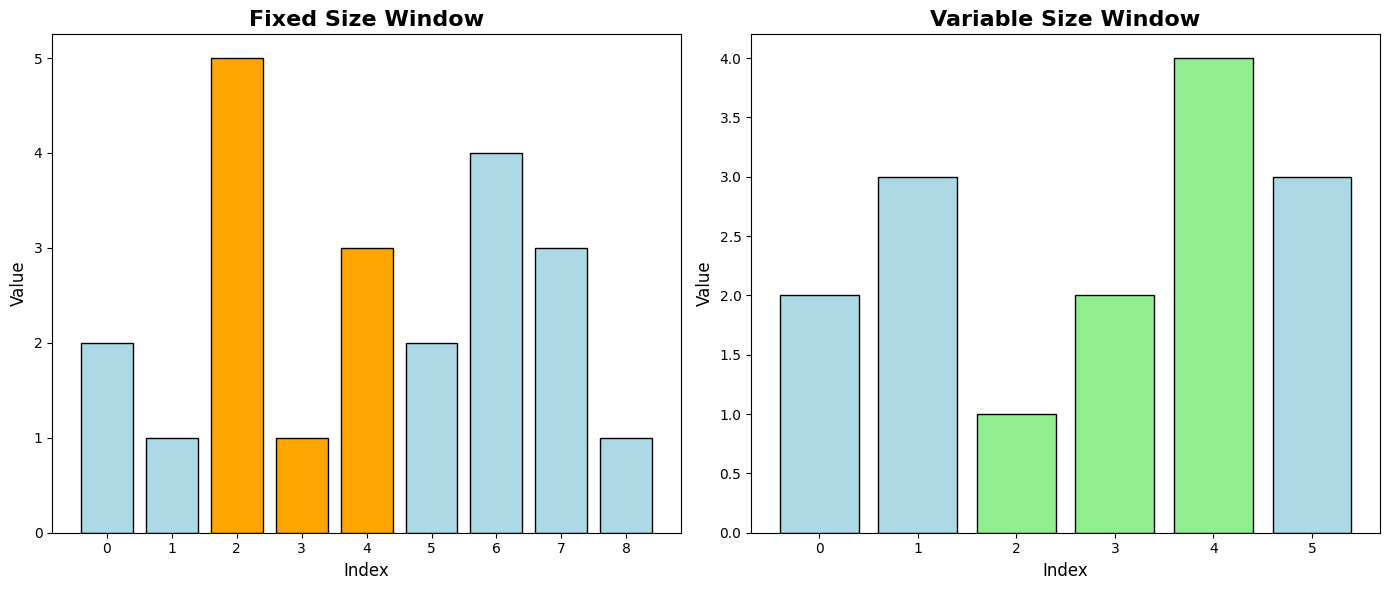

🎯 Remember: Sliding Window transforms O(n²) problems into O(n) solutions!


In [10]:
# Visual Summary: When to Use Each Approach
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Fixed Window Visualization
ax1.set_title('Fixed Size Window', fontsize=16, fontweight='bold')
arr1 = [2, 1, 5, 1, 3, 2, 4, 3, 1]
positions = np.arange(len(arr1))
colors = ['lightblue'] * len(arr1)
colors[2:5] = ['orange'] * 3  # Highlight window

bars1 = ax1.bar(positions, arr1, color=colors, edgecolor='black')
ax1.set_xlabel('Index', fontsize=12)
ax1.set_ylabel('Value', fontsize=12)
ax1.set_xticks(positions)
ax1.annotate('Window (k=3)', xy=(3, 5.5), fontsize=12, ha='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.7))

# Variable Window Visualization  
ax2.set_title('Variable Size Window', fontsize=16, fontweight='bold')
arr2 = [2, 3, 1, 2, 4, 3]
positions2 = np.arange(len(arr2))
colors2 = ['lightblue'] * len(arr2)
colors2[2:5] = ['lightgreen'] * 3  # Highlight optimal window

bars2 = ax2.bar(positions2, arr2, color=colors2, edgecolor='black')
ax2.set_xlabel('Index', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_xticks(positions2)
ax2.annotate('Optimal Window\n(sum ≥ 7)', xy=(3, 4.5), fontsize=12, ha='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.tight_layout()
plt.show()

print("🎯 Remember: Sliding Window transforms O(n²) problems into O(n) solutions!")
